In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

from utils import *
from models import *
from tqdm import tqdm

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
d = 3
m = 8
t = 200
n = 100000
lamda = 0.2
distance = 0.1
coherent = False

array_ula = ULA(m, lamda)
array_ula.build_sensor_positions(distance)
array_ula.build_array_manifold()

array_nested = NestedArray1D(m, lamda)
array_nested.build_sensor_positions(distance, [4, 4])
array_nested.build_array_manifold()

loss_cpu = RMSPE(d, 'cpu')
loss_cuda = RMSPE(d, 'cuda')

path = 'saved_models/'

SNRs = [-10.0, -5.0, 0.0, 5.0, 10.0, 15.0, 20.0]
methods = []
mean_mse = {}

In [4]:
methods.append("MUSIC")
# mean_mse["MUSIC"] = []
# music_360_ula = MUSIC(d, array_ula, -torch.pi/2, torch.pi/2, 360)

# for snr in SNRs:

#     observations, angles = generate_data(n, t, d, snr, snr, array_ula, False, coherent)

#     results_music_360_ula = []
#     for i in range(observations.shape[0]):
#         theta_est, _, _ = music_360_ula.estimate(observations[i].T)
#         results_music_360_ula.append(theta_est)
#     results_music_360_ula = torch.stack(results_music_360_ula, dim=0)
    
#     mse_music_360_ula = loss_cpu(results_music_360_ula, angles)
#     mean_mse['MUSIC'].append(mse_music_360_ula)

In [5]:
methods.append("DA-MUSIC")
# mean_mse["DA-MUSIC"] = []

# for snr in SNRs:

#     observations, angles = generate_data(n, t, d, snr, snr, array_ula, False, coherent)

#     test_set = DATASET(observations, angles)
#     test_loader = DataLoader(test_set, batch_size=512, shuffle=False)

#     da_music = DA_MUSIC(m, d, array_ula, dev)
#     mean_mse['DA-MUSIC'].append(test(da_music, test_loader, path+'da_music_'+str(snr)+'dB_ula.pth', loss_cuda, dev))

In [6]:
methods.append("Proposed Modified DA-MUSIC")
# mean_mse["Proposed Modified DA-MUSIC"] = []

# for snr in SNRs:

#     observations, angles = generate_data(n, t, d, snr, snr, array_ula, False, coherent)

#     test_set = DATASET(observations, angles)
#     test_loader = DataLoader(test_set, batch_size=512, shuffle=False)

#     da_music_v2 = DA_MUSIC_v2(m, d, array_ula, dev)
#     mean_mse['Proposed Modified DA-MUSIC'].append(test(da_music_v2, test_loader, path+'da_music_v2_'+str(snr)+'dB_ula.pth', loss_cuda, dev))

In [7]:
methods.append("Proposed DD Model")
# mean_mse["Proposed DD Model"] = []

# for snr in SNRs:

#     observations, angles = generate_data(n, t, d, snr, snr, array_ula, False, coherent)

#     test_set = DATASET(observations, angles)
#     test_loader = DataLoader(test_set, batch_size=512, shuffle=False)

#     rnn = RNN(m, d, dev)
#     mean_mse['Proposed DD Model 20.000 Examples'].append(test(rnn, test_loader, path+'rnn_'+str(snr)+'dB_ula.pth', loss_cuda, dev))

In [8]:
# methods.append("Proposed DD Model 2.000 Examples")
# mean_mse["Proposed DD Model 2.000 Examples"] = []

# for snr in SNRs:

#     observations, angles = generate_data(n, t, d, snr, snr, array_ula, False, coherent)

#     test_set = DATASET(observations, angles)
#     test_loader = DataLoader(test_set, batch_size=512, shuffle=False)

#     rnn = RNN(m, d, dev)
#     mean_mse['Proposed DD Model 2.000 Examples'].append(test(rnn, test_loader, 'few_data/rnn_'+str(snr)+'dB_ula.pth', loss_cuda, dev))

In [9]:
# methods.append("Proposed DD Model 2.000 Examples + Data Augmentation")
# mean_mse["Proposed DD Model 2.000 Examples + Data Augmentation"] = []

# for snr in SNRs:

#     observations, angles = generate_data(n, t, d, snr, snr, array_ula, False, coherent)

#     test_set = DATASET(observations, angles)
#     test_loader = DataLoader(test_set, batch_size=512, shuffle=False)

#     rnn = RNN(m, d, dev)
#     mean_mse['Proposed DD Model 2.000 Examples + Data Augmentation'].append(test(rnn, test_loader, 'few_data/aug_rnn_'+str(int(snr))+'dB_ula.pth', loss_cuda, dev))

In [10]:
# torch.save(mean_mse, 'mean_mse.pth')

/tmp/ipykernel_316010/4045028057.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mean_mse = torch.load('mean_mse.pth')


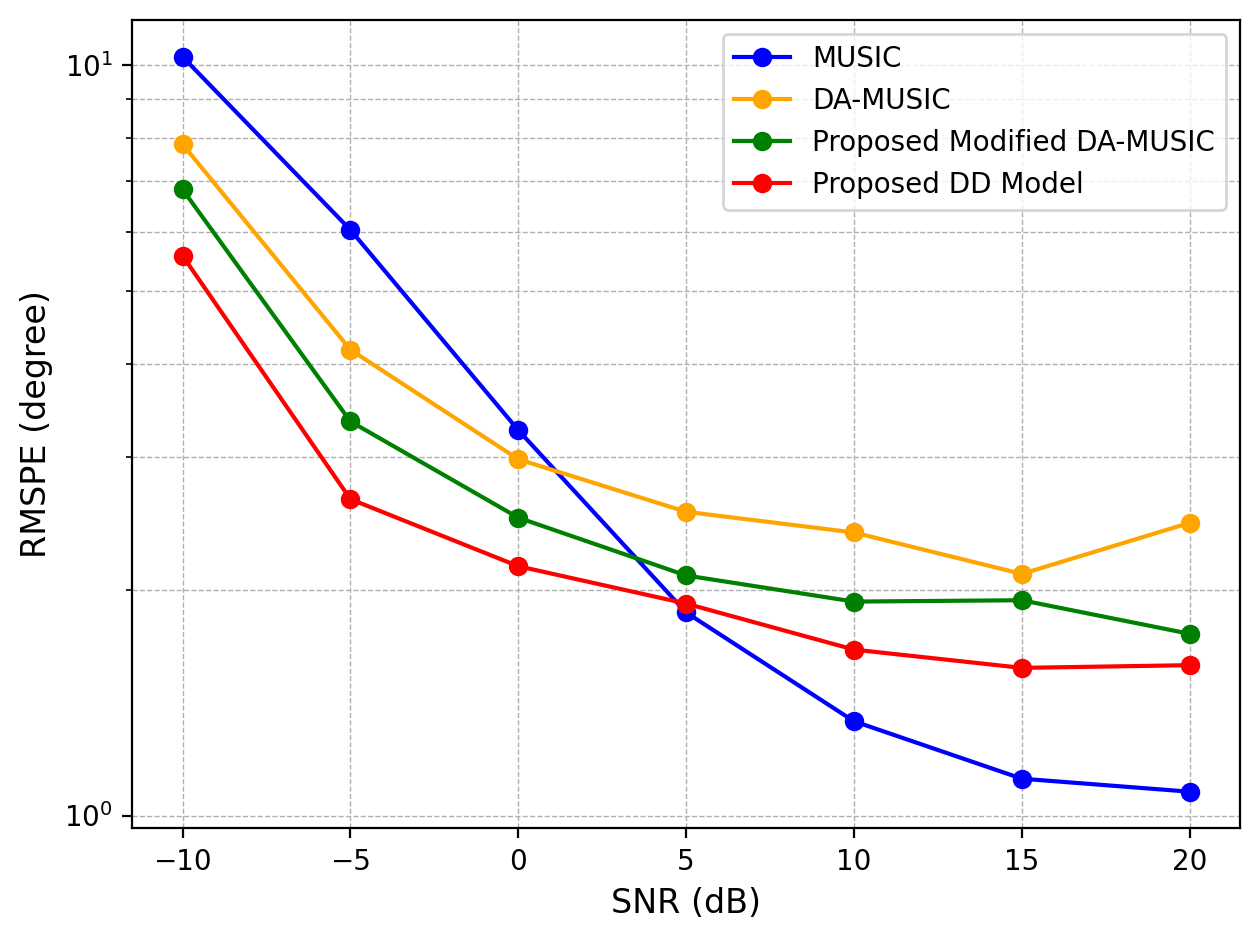

In [11]:
mean_mse = torch.load('mean_mse.pth')

colors = ['blue', 'orange', 'green', 'red']

for i, method in enumerate(methods):
    plt.plot(SNRs, [x/torch.pi*180 for x in mean_mse[method]], marker='o', label=method, color=colors[i])
plt.rcParams['figure.dpi'] = 150

plt.yscale("log")
# plt.title("{} scenarios".format(n), fontsize=14)
plt.xlabel("SNR (dB)", fontsize=12)
plt.ylabel("RMSPE (degree)", fontsize=12)
plt.xticks(SNRs)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
# plt.legend(title="Methods", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import time

def measure_inference_time(model, input_tensor, runs=100):
    model.eval() 
    with torch.inference_mode():  
        for _ in range(10):
            _ = model(input_tensor)
        start_time = time.perf_counter()
        for _ in range(runs):
            _ = model(input_tensor)
        torch.cuda.synchronize()
        end_time = time.perf_counter()
    avg_time = (end_time - start_time) / runs
    return avg_time